# ARIMA model

In [4]:
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'
import nb_credit_spread as cslibrary
cslib = cslibrary.creditspread()
column = 'CS-Aaa-3MO'

In [9]:
def __print(message):
    # print(message)
    pass

def jb_and_dw_test(actual, predict):
    from statsmodels.stats.stattools import jarque_bera, durbin_watson
    from sklearn.metrics import mean_squared_error
    import numpy as np
    import math as math
    

    __print(f"{'-'*10} jb_and_dw_test {'-'*10}")

    # print(predict.head)
    res = actual - predict
    # print(res)
    mse = mean_squared_error(actual, predict)
    rmse = math.sqrt(mse)
    mean = sum(res) / len(res)
    __print(f'mse: {mse} rmse: {rmse} mean: {mean}')

    mape = np.mean(np.abs((actual - predict) / actual))   # mean absolute percentage error

    score, jb_pvalue, _, _ = jarque_bera(res)

    if jb_pvalue < 0.05:
        __print(f'JB test. residuals are NOT be normally distributed. {jb_pvalue}')
    else:
        __print(f'JB test. residuals seem normally distributed. {jb_pvalue}')

    dw_res = durbin_watson(res)
    if 1.5 <= dw_res <= 2.5:
        __print(f'DW test. no evidence of autocorrelation in residuals. {dw_res}')
    else:
        __print(f'DW test. evidence of autocorrelation in residuals. {dw_res}')

    return res, jb_pvalue, dw_res, mse, rmse, mean, mape

## autocorrelation plot of series

data shape: (127, 28)


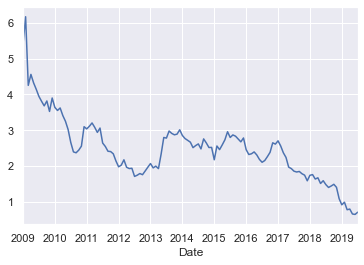

127


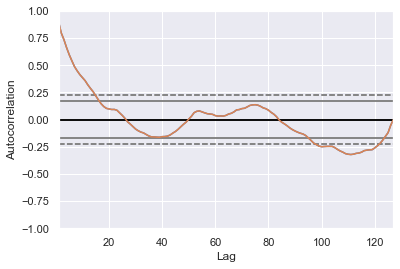

In [6]:
'''
autocorelation plot
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
ytw = cslib.get_ytw_from_date(start=start_date)
print(f"data shape: {ytw.shape}")
column = column
endog = ytw[column]
endog.plot()
plt.show()

autocorrelation_plot(endog)

ax = autocorrelation_plot(endog)
print(ax.lines[5].get_data()[1].size)


In [7]:
def plot_it(train=None, predict=None, actual=None, column='TBA'):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set()
    fig = plt.figure(figsize=(10,4))
    # fig.suptitle(f'column: {column}')

    plt.clf()
    plt.title(column, fontsize=12)
    plt.plot(train)
    plt.plot(predict)
    plt.plot(actual)
    plt.legend(('train', 'predict', 'actual'), fontsize=10)
    return plt

(127, 28)
---------- ARIMA order: (3, 1, 0) ----------
                               SARIMAX Results                                
Dep. Variable:             CS-Aaa-3MO   No. Observations:                  127
Model:                 ARIMA(3, 1, 0)   Log Likelihood                   8.278
Date:                Sun, 13 Sep 2020   AIC                             -4.557
Time:                        00:26:20   BIC                             12.461
Sample:                    01-31-2009   HQIC                             2.357
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.062e-08   1.67e-09     30.354      0.000    4.73e-08    5.39e-08
x1            -0.0443      0.027     -1.623      0.105      -0.098       0.0

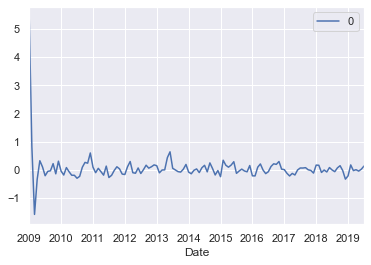

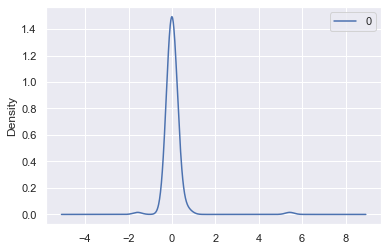

In [8]:
'''
ARIMA or atleast ARMA; no integration
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera, durbin_watson
from sklearn.metrics import mean_squared_error

sns.set()

ytw = cslib.get_ytw_from_date(start=start_date)
print(ytw.shape)
column = column
endog = ytw[column]

order = (3, 1, 0)

print(f"{'-'*10} ARIMA order: {order} {'-'*10}")
model = ARIMA(endog, order=order, trend='ct')

model_fit = model.fit()
print(model_fit.summary())

res = DataFrame(model_fit.resid)
# fig = plt.figure(figsize=(10,4))
res.plot()
res.plot(kind='kde')

score, pvalue, _, _ = jarque_bera(res)

if pvalue < 0.05:
    print (f'JB test. residuals are NOT be normally distributed. {pvalue}')
else:
    print (f'JB test. residuals seem normally distributed. {pvalue}')

dw_res = durbin_watson(res)
if 1.5 <= dw_res <= 2.5:
    print(f'DW test. no evidence of autocorrelation in residuals. {dw_res}')
else:
    print(f'DW test. evidence of autocorrelation in residuals. {dw_res}')

print(res.describe())
print(f"aic: {model_fit.aic} bic: {model_fit.bic} hqic: {model_fit.hqic}")

## IGNORE THE FOLLOWING CELL

In [ ]:
'''
train ARIMA model at 80% to predict 20%
'''
# from statsmodels.tsa.api import ARIMA # VAR, VECM
from statsmodels.tsa.arima.model import ARIMA

ytw = cslib.get_ytw_from_date(start=start_date)
print(ytw.shape)
column = column
endog = ytw[column]
order = (3, 1, 0)

length = int(len(endog) * 0.8)
train, actual = endog[0:length], endog[length:len(endog)] # set training as 80% data. set 20% to actual
# exog = exog[0:length]
exog = None

pre_start, pre_end = '2017-06-30', '2019-07-31'
print(f'train: {train.shape} actual: {actual.shape} exog: {exog.shape if exog != None else exog}')

#history = [x for x in train]
#print(history)
# model = ARIMA(train, order =(3,1,0))
# model_fit = model.fit()

'''
print(f"{'-'*10} ARIMA with diff periods=1 {'-'*10}")
model = ARIMA(train.diff(periods=1).dropna(), order=(3, 0, 0), trend='ct')
model_fit = model.fit()
print(model_fit.summary())
predict = model_fit.predict(start=pre_start, end=pre_end)
jb_and_dw_test(actual, predict)
# plot_it(train, predict, actual)
'''

# order = (3, 0, 0) # should d=1 be introduced due to stationarity for first order difference
order = order
print(f"{'-'*10} {column} ARIMA order: {order} {'-'*10}")
model = ARIMA(endog=train, order=order, trend='ct')
model_fit = model.fit()
print(model_fit.summary())

predict = model_fit.predict(start=pre_start, end=pre_end)
# jb_and_dw_test(actual, predict)
# plot_it(train, predict, actual)


# REFERENCE ONLY
## Plot ACF and PACF for original, 1st and 2nd order difference

In [ ]:
''' check ADF '''
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller
print(f"{'-'*10} {column} {'-'*10}")

df = x=ytw[column]
result = adfuller(x=df.dropna(), regression='ct', autolag='BIC')
print('ADF Statistic: %f' % result[0])
adf_pvalue = result[1]
print(f"p-value: {adf_pvalue} > 0.05? {'non-stationary' if adf_pvalue > 0.05 else 'stationary'}")

''' check ADF first difference '''
df_diff1 = ytw[column].diff(periods=1).dropna()
result = adfuller(x=df_diff1, regression='ct', autolag='BIC')
print('ADF Statistic: %f' % result[0])
adf_pvalue = result[1]
print(f"p-value: {adf_pvalue} > 0.05? {'non-stationary' if adf_pvalue > 0.05 else 'stationary'}")

''' check ADF second difference '''
df_diff2 = df_diff1.diff(periods=1).dropna()
result = adfuller(x=df_diff2, regression='ct', autolag='BIC')
print('ADF Statistic: %f' % result[0])
adf_pvalue = result[1]
print(f"p-value: {adf_pvalue} > 0.05? {'non-stationary' if adf_pvalue > 0.05 else 'stationary'}")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)
plot_acf(df_diff1)
plot_pacf(df_diff1)
plot_acf(df_diff2)
plot_pacf(df_diff2)

''' find difference term '''

endog = ytw[column]


In [ ]:
res = DataFrame(model_fit.resid)
# fig = plt.figure(figsize=(10,4))
res.plot()
res.plot(kind='kde')

score, pvalue, _, _ = jarque_bera(res)

if pvalue < 0.05:
    print (f'JB test. residuals are NOT be normally distributed. {pvalue}')
else:
    print (f'JB test. residuals seem normally distributed. {pvalue}')

dw_res = durbin_watson(res)
if 1.5 <= dw_res <= 2.5:
    print(f'DW test. no evidence of autocorrelation in residuals. {dw_res}')
else:
    print(f'DW test. evidence of autocorrelation in residuals. {dw_res}')

print(res.describe())

# ARIMA to fit model

In [ ]:
column = 'CS-Aaa-3MO'
endog, exog = ytw[column], None

o = (3, 1, 3)
print(f"{'-'*10} ARIMA order: {o} {'-'*10}")
model = ARIMA(endog=endog, exog=exog, order=o, trend='c')
model_fit = model.fit()
print(model_fit.summary())
print(f"model fit bic: {model_fit.bic}")
model_fit.predict().plot()
endog.plot()
print(model_fit.resid)

## ARIMA to plot prediction

In [4]:
from statsmodels.stats.stattools import jarque_bera, durbin_watson
length = int(len(endog) * 0.8)

train, actual = endog[0:length], endog[length:len(endog)] # set training as 80% data. set 20% to actual
# exog = exog[0:length]
exog = None

pre_start, pre_end = '2017-06-30', '2019-07-31'
print(f'train: {train.shape} actual: {actual.shape} exog: {exog.shape if exog != None else exog}')

predict = model_fit.predict(start=pre_start, end=pre_end)
res, jb_pvalue, dw_res, mse, rmse, mean, mape = jb_and_dw_test(actual, predict)
print(f"jb: {jb_pvalue} dw: {dw_res} mse: {mse} rmse: {rmse} mean: {mean} mape: {mape}")
plot_it(train, predict, actual, column)
print(res.describe())

train: (101,) actual: (26,) exog: None


NameError: name 'model_fit' is not defined

# Check AR and MA

In [2]:

import logging
clearlogger()
log_debug = setlogging('optimum-ic-DEBUG', logging.DEBUG)
log_debug.info('start')
log_info = setlogging('optimum-ic-MIN-INFO', logging.INFO)
log_info.info('start')

def get_all_ic(ytw, endog, exog=None, trend=None):
    import pandas as pd
    from statsmodels.tsa.arima.model import ARIMA

    column = endog.name
    column_exog = exog.name

    ic = pd.DataFrame(columns=['cs', 'exog', 'trend', 'order','aic','bic', 'hqic'])
    for d in range(1,2):
        for ar in range(0, 5):
            for ma in range(0, 8):
                try:
                    model_fit = ARIMA(endog=endog, exog=exog, order=(ar, d, ma), trend=trend).fit()
                    i = {'cs': column, 'exog': column_exog, 'trend': trend, 'order': f"{ar},{d},{ma}", 'aic': model_fit.aic, 'bic': model_fit.bic, 'hqic': model_fit.hqic}
                    ic = ic.append(i, ignore_index=True)
                except ValueError:
                    pass

    print_full(ic, log_debug)

    log_info.info(f"{column} {column_exog} {trend} aic: {ic.loc[ic['aic'].idxmin()]['order']} bic: {ic.loc[ic['bic'].idxmin()]['order']} hqic: {ic.loc[ic['hqic'].idxmin()]['order']}")

import nb_credit_spread as cslibrary
cslib = cslibrary.creditspread()
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'
ytw = cslib.get_ytw_from_date_delta(start=start_date)

icNone = ['c', 'ct', None]
endog_list = ['CS-Aaa-3MO', 'CS-Aa-3MO', 'CS-A-3MO', 'CS-Baa-3MO']
exog_list = ['Market-RMRF-delta', 'Market-SP500-delta']
exog_list = ['Econ-UNRATE-delta', 'Econ-DSPIC96-delta', 'Econ-CPIAUCSL-delta', 'Econ-CPILFESL-delta', 'Econ-INDPRO-delta', 'Econ-PCE-delta']
exog_list = [None, 'Market-RMRF-delta', 'Market-SP500-delta', 'Econ-UNRATE-delta', 'Econ-DSPIC96-delta', 'Econ-CPIAUCSL-delta', 'Econ-CPILFESL-delta', 'Econ-INDPRO-delta', 'Econ-PCE-delta']

exog_list = ['Econ-UNRATE-delta', 'Econ-DSPIC96-delta', 'Econ-CPIAUCSL-delta', 'Econ-CPILFESL-delta', 'Econ-INDPRO-delta', 'Econ-PCE-delta', 'Market-RMRF-delta', 'Market-SP500-delta']

for i in endog_list: 
    for j in exog_list:
        for k in icNone:
            get_all_ic(ytw, ytw[i], ytw[j], k)

NameError: name 'setlogging' is not defined

# ARIMA fit model. Train 80%. CS endog. None exog

In [3]:
import nb_credit_spread as cslibrary
from statsmodels.tsa.arima.model import ARIMA

cslib = cslibrary.creditspread()
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'

ytw = cslib.get_ytw_from_date(start=start_date)

endog_col, exog_col, trend, order = 'CS-Aaa-3MO', None, 'c', (3, 1, 0)
endog, exog = ytw[endog_col], None

print(f"{'-'*10} ARIMA order: {order} column: {endog_col} {'-'*10}")
model_fit = ARIMA(endog=endog, exog=exog, order=o, trend=trend).fit()
print(model_fit.summary())
# print(f"model fit aic {model_fit.aic} bic: {model_fit.bic} hqic: {model_fit.hqic}")
model_fit.predict().plot()
endog.plot()
print(model_fit.resid)

from statsmodels.stats.stattools import jarque_bera, durbin_watson
length = int(len(endog) * 0.8)

train, actual = endog[0:length], endog[length:len(endog)] # set training as 80% data. set 20% to actual
# exog = exog[0:length]
exog = exog

pre_start, pre_end = '2017-06-30', '2019-07-31'
# print(f'train: {train.shape} actual: {actual.shape} exog: {exog.shape if exog != None else exog}')

predict = model_fit.predict(start=pre_start, end=pre_end, exog=exog)

res, jb_pvalue, dw_res, mse, rmse, mean, mape = jb_and_dw_test(actual, predict)
print(f"aic: {model_fit.aic} bic: {model_fit.bic} hqic: {model_fit.hqic} jb: {jb_pvalue} dw: {dw_res} mse: {mse} rmse: {rmse} mean: {mean} mape: {mape}")

print(f"{'*'*10} ARIMA order: {o} cs: {endog_col} results (aic, bic, hqic, jb, dw, mse, rmse, mean, mape) {'*'*10}")
print(f"{model_fit.aic} {model_fit.bic} {model_fit.hqic} {jb_pvalue} {dw_res} {mse} {rmse} {mean} {mape}")
print(f"{'*'*10} {'*'*10}")

plot_it(train, predict, actual, endog_col)
print(res.describe())


---------- ARIMA order: (3, 1, 0) column: CS-Aaa-3MO ----------


NameError: name 'o' is not defined

# ARIMA to fit model. train on 80% of CS endog. TB exog
### TB-3MO-TY-delta TB-1YR-TY-delta TB-5YR-TY-delta
### Market-RMRF-delta Market-SP500-delta
### Econ-UNRATE-delta Econ-DSPIC96-delta Econ-CPIAUCSL-delta Econ-CPILFESL-delta Econ-INDPRO-delta Econ-PCE-delta

### n.b. model_fit.forecasts[0] - returns first coeff of model_summary
#### model_fit.mse - mean squared error 
#### model_fit.mae - mean absolute error
#### model_fit.fittedvalues - returns dataframe of model_fit.forecasts

#### model_fit.arparams: array([-0.28845615,  0.34849642,  0.24594168]) - return summary coeff
#### model_fit.tvalues - same as model_fit.zvalues
#### model_fit.pvalues - pvlaues from summary
#### model_fit.zvalues - z from summary
#### model.fit.llf - log likelihood from summary
#### model_fit.model - returns the model. model.model_names - gets dictionary of ['ar']

In [7]:
import logging

def clearlogger():
    try:
        import logging
        # logger = logging.getLogger()
        while logger.hasHandlers():
            logger.removeHandler(logger.handlers[0])

        if (logger.hasHandlers()):
            logger.handlers.clear()
    except:
        pass

def setlogging(name, level=logging.INFO):
    import logging
    # clearlogger()
    # global_model_name = name
    logger = logging.getLogger(name)
    fhandler = logging.FileHandler(filename=f'../logs/{name}-{level}.log') #, mode='a')
    # formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    # fhandler.setFormatter(formatter)
    logger.addHandler(fhandler)
    logger.setLevel(level)
    return logger

def print_full(df, log):
    '''
    write contents of dataframe to logger
    '''
    import pandas as pd

    pd.set_option('display.max_rows', len(df))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.6f}'.format)
    pd.set_option('display.max_colwidth', None)
    log.info(df)

def __print(message):
    # print(message)
    pass

def save_plot(plt, name):
    f = f"../plots/{name}.png"
    plt.savefig(f"{f}")
    plt.close('all')

def run_model(ytw_delta, column, order, trend='c', exog=None):
    import pandas as pd
    from statsmodels.tsa.arima.model import ARIMA
    
    endog_col = column
    # endog, exog = ytw_delta[endog_col], ytw_delta[['TB-5YR-TY-delta']]
    endog = ytw_delta[column]

    __print(f"{'-'*10} ARIMA order: {order} {'-'*10}")
    model = ARIMA(endog=endog, exog=exog, order=order, trend=trend)
    model_fit = model.fit()
    __print(model_fit.summary())
    
    logging.getLogger(global_model_name).info(model_fit.summary())
    
    __print(f"model fit aic {model_fit.aic} bic: {model_fit.bic} hqic: {model_fit.hqic}")
    model_fit.predict().plot()
    endog.plot()
    __print(model_fit.resid)

    # from statsmodels.stats.stattools import jarque_bera, durbin_watson
    
    length = int(len(endog) * 0.8)
    train, actual = endog[0:length], endog[length:len(endog)] # set training as 80% data. set 20% to actual
    # exog = exog[0:length]
    exog = exog

    pre_start, pre_end = '2017-06-30', '2019-07-31'

    predict = model_fit.predict(start=pre_start, end=pre_end, exog=exog)
    res, jb_pvalue, dw_res, mse, rmse, mean, mape = jb_and_dw_test(actual, predict)
    __print(f"aic: {model_fit.aic} bic: {model_fit.bic} hqic: {model_fit.hqic} jb: {jb_pvalue} dw: {dw_res} mse: {mse} rmse: {rmse} mean: {mean} mape: {mape}")

    __print(f"{'*'*10} ARIMA order: {order} cs: {endog_col} results (aic, bic, hqic, jb, dw, mse, rmse, mean, mape) {'*'*10}")
    __print(f"{model_fit.aic} {model_fit.bic} {model_fit.hqic} {jb_pvalue} {dw_res} {mse} {rmse} {mean} {mape}")
    __print(f"{'*'*10} {'*'*10}")

    plot = plot_it(train, predict, actual, f"{global_model_name}-{endog_col}")
    save_plot(plot, f'{global_model_name}-{column}')

    __print(res.describe())

    return {'cs': column, 'order': order, 'aic': model_fit.aic, 'bic': model_fit.bic, 'hqic': model_fit.hqic, 'jb_pvalue': jb_pvalue, 'dw_res': dw_res, 'llf': model_fit.llf, 'mse': mse, 'rmse': rmse, 'mean': mean, 'mape': mape}


In [8]:
import nb_credit_spread as cslibrary

cslib = cslibrary.creditspread()
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'
df = cslib.get_ytw_from_date_delta(start=start_date)

import pandas as pd

clearlogger()
exog = None
trend ='ct'
global_model_name = f"ARIMA-CS-V1-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 2), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 4), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-1YR', order=(4, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-5YR', order=(3, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-5YR', order=(3, 1, 6), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-5YR', order=(3, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-5YR', order=(3, 1, 4), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
exog = None
trend ='c'
global_model_name = f"ARIMA-CS-V1-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 2), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 4), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-1YR', order=(4, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-5YR', order=(3, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-5YR', order=(3, 1, 6), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-5YR', order=(3, 1, 3), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-5YR', order=(3, 1, 4), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
exog = None
trend ='c'
global_model_name = f"ARIMA-CS-V2-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 1), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 2), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-1YR', order=(4, 1, 2), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-5YR', order=(3, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-5YR', order=(3, 1, 6), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-5YR', order=(3, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-5YR', order=(1, 1, 2), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
exog = df[['Econ-UNRATE-delta', 'Econ-DSPIC96-delta', 'Econ-CPIAUCSL-delta', 'Econ-CPILFESL-delta', 'Econ-INDPRO-delta', 'Econ-PCE-delta']]
trend ='c'
global_model_name = f"ARIMA-CS-V2-X-Econ-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 1), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 2), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-1YR', order=(4, 1, 2), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-5YR', order=(3, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-5YR', order=(3, 1, 6), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-5YR', order=(3, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-5YR', order=(1, 1, 2), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
exog = df[['Market-RMRF-delta', 'Market-SP500-delta']]
trend ='c'
global_model_name = f"ARIMA-CS-V2-X-Market-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 1), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 2), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-1YR', order=(4, 1, 2), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-1YR', order=(4, 1, 5), exog=exog, trend=trend), ignore_index=True)

t = t.append(run_model(df, column='CS-Aaa-5YR', order=(3, 1, 5), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-5YR', order=(3, 1, 6), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-5YR', order=(3, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-5YR', order=(1, 1, 2), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
trend ='c'
global_model_name = f"ARIMA-CS-V2-X-TB-3MO-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 0), exog=df[['TB-3MO-TY-delta']], trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 1), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 2), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
trend ='c'
global_model_name = f"ARIMA-CS-V2-X-TB-1YR-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-1YR', order=(3, 1, 0), exog=df[['TB-1YR-TY-delta']], trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-1YR', order=(1, 1, 1), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-1YR', order=(2, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-1YR', order=(3, 1, 2), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))

clearlogger()
trend ='c'
global_model_name = f"ARIMA-CS-V2-X-TB-5YR-{trend}"
log = setlogging(f'{global_model_name}')
log.info(f"{'*'*10} {global_model_name} {'*'*10}")
t = pd.DataFrame(columns=['cs', 'order', 'aic','bic','hqic', 'jb_pvalue', 'dw_res', 'llf', 'mse', 'rmse', 'mean', 'mape'])
t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 0), exog=df[['TB-5YR-TY-delta']], trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Aa-5YR', order=(1, 1, 1), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-A-5YR', order=(2, 1, 0), exog=exog, trend=trend), ignore_index=True)
t = t.append(run_model(df, column='CS-Baa-5YR', order=(3, 1, 2), exog=exog, trend=trend), ignore_index=True)
print_full(t, logging.getLogger(global_model_name))


/Users/Justin/Desktop/git-hub-justin-grigg/testPythonDissAnalysis/env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


NameError: name 'jb_and_dw_test' is not defined

# FOR REFERENCE:
## Quick test on d in ARIMA compared to first difference of column and compare coefficient

In [ ]:
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'
column = 'CS-Aaa-3MO'

ytw_diff = cslib.get_ytw_from_date(start=start_date)
from statsmodels.tsa.arima.model import ARIMA
endog = ytw_diff[f"{column}"]
o = (0, 1, 0)
model_fit = ARIMA(endog=endog, exog=None, order=o, trend='ct').fit()
print(model_fit.summary())

# ytw_diff = cslib.get_ytw_from_date_delta(start='2008-12-31')
ytw_diff = cslib.get_ytw_from_date_delta(start=start_date)
from statsmodels.tsa.arima.model import ARIMA
endog = ytw_diff[f"{column}-delta"]
o = (0, 0, 0)
model_fit = ARIMA(endog=endog, exog=None, order=o, trend='ct').fit()
print(model_fit.summary())

## ARIMA to fit model. train on 80% of CS endog and exog

In [ ]:
column, tb, sandp, sandp_delta, rmrf = 'CS-Aaa-3MO', 'TB-3MO-TY', 'Market-SP500', 'Market-SP500-change', 'Market-RMRF'
endog, exog = ytw[column], ytw[[rmrf, sandp, sandp_delta]] # , ytw[sandp_delta]

o = (3, 1, 3)
model_fit = ARIMA(endog=endog, exog=None, order=o, trend='ct').fit()
print(model_fit.summary())
# print(model_fit.resid)

model_fit = ARIMA(endog=endog, exog=exog, order=o, trend='ct').fit()
print(model_fit.summary())
# print(model_fit.resid)

endog.plot()
exog.plot()


In [ ]:
from statsmodels.stats.stattools import jarque_bera, durbin_watson
length = int(len(endog) * 0.8)

train, actual = endog[0:length], endog[length:len(endog)] # set training as 80% data. set 20% to actual
# exog = exog[0:length]
exog = None

pre_start, pre_end = '2017-06-30', '2019-07-31'
print(f'train: {train.shape} actual: {actual.shape} exog: {exog.shape if exog != None else exog}')

predict = model_fit.predict(start=pre_start, end=pre_end)
res, jb_pvalue, dw_res, mse, rmse, mean, mape = jb_and_dw_test(actual, predict)
print(f"jb: {jb_pvalue} dw: {dw_res} mse: {mse} rmse: {rmse} mean: {mean}")
plot_it(train, predict, actual, column)
print(res.describe())